# DEEP LEARNING FOR COMPUTER VISION: <br> A PRACTITIONER'S VIEWPOINT

### André Panisson <br> Alan Perotti 
#### ISI Foundation
---

# System equirements

- Windows/MacOS/Linux 64 bits architecture
- Anaconda with Python 3.6 (https://www.anaconda.com/download/)
- Keras 2.1.6:
    - `conda install tensorflow=1.7.0 keras=2.1.6` if you don't have a NVidia GPU
    - `conda install tensorflow-gpu=1.7.0 keras=2.1.6` if you have a NVidia GPU


In [1]:
%pylab inline

import sklearn
import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
print("Scikit-Learn version: " + sklearn.__version__)
print("Tensorflow version: " + tf.__version__)
print("Keras version: " + keras.__version__)

Scikit-Learn version: 0.19.1
Tensorflow version: 1.7.0
Keras version: 2.1.6


## Pre-download dataset and CNN models

In [3]:
from keras.datasets import mnist,cifar10
mnist.load_data();
cifar10.load_data();

In [4]:
from keras.applications import inception_v3
model = inception_v3.InceptionV3(include_top=True, weights='imagenet')
model = inception_v3.InceptionV3(include_top=False, weights='imagenet')

## For GPU enabled systems

**Linux users**: [Steps to install an AWS instance with GPU support](https://medium.com/@dichen_5479/setup-tensorflow-gpu-with-aws-ec2-on-ubuntu-16-04-in-10-minutes-7ee64e47a66a)


In [5]:
from keras import backend as K
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
K.set_session(session)

In [6]:
def test_gpu_capabilities():
    try:
        with tf.device('/gpu:0'):
            a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
            b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
            c = tf.matmul(a, b)

        with tf.Session() as sess:
            r = sess.run(c)
            print ("Tensorflow is using GPU")
    except:
        print ("Tensorflow is using CPU")
        
test_gpu_capabilities()

Tensorflow is using GPU


In [7]:
!nvidia-smi

Mon Oct  8 16:44:12 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.48                 Driver Version: 410.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GRID K520           Off  | 00000000:00:03.0 Off |                  N/A |
| N/A   36C    P0    44W / 125W |    343MiB /  4037MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# DEEP LEARNING FOR COMPUTER VISION: <br> A PRACTITIONER'S VIEWPOINT

### André Panisson <br> Alan Perotti 
#### ISI Foundation
---

In [8]:
import numpy as np

# Computer Vision

Vision is hard for machines..

<img src="./figures/linea.png" width="250"/>
<img src="./figures/bignum.png" width="250"/>

Relevant XKCD (2014!)

<img src="./figures/xkcd.png" width="400"/>

A couple years later, a 50MB apk on Android, offline..

<tr>
    <td> <img src="./figures/bird.JPG" style="width: 500px;"/> </td>
</tr>

..and it all started with Alexnet! <3

<tr>
    <td> <img src="./figures/imagenet.png" style="width: 500px;"/> </td>
</tr>

So why is this hard again? Easy: you can't define a '2'

<tr><td><img src="./figures/mnist.png" style="width: 700px;"/></td></tr>

# Convolutional Neural Networks

So how do machines see? Hierarchically!

<tr><td><img src="./figures/hierarchical_features.png" style="width: 700px;"/></td></tr>

Ok, but how?

<tr>
    <td> <img src="https://flickrcode.files.wordpress.com/2014/10/conv-net2.png" alt="Drawing" style="width: 800px;"/> </td>
</tr>

Key ingredient: the convolution

<img src="https://docs.microsoft.com/en-us/cognitive-toolkit/tutorial2/convlayer.png" alt="Drawing" style="width: 700px;"/>

Also used: maxpooling

<img src="https://qph.fs.quoracdn.net/main-qimg-8afedfb2f82f279781bfefa269bc6a90.webp" alt="Drawing" style="width: 500px;"/>
<br><br><br>

<img src="https://qph.fs.quoracdn.net/main-qimg-3a8a3a78734fed3301ed3546634b871a.webp" alt="Drawing" style="width: 500px;"/>  

# Keras

## Introduction to Keras

Keras is a minimalist, highly modular neural network library written in Python and built on top of Tensorflow and Theano. It is easier to use than pure Tensorflow, as it includes several functionalities:

- Standard APIs for sequential and functional models with feedforward, convolutional, and recurrent layers
- Several optimization algorithms and advanced activation functions
- Monitoring/callback support
- Easily extensible

Simple models, such as feedforward networks, are straightforward to implement. The code below is the entire definition of a multilayer perceptron classifier for the MNIST dataset:

In [9]:
from keras.models import Model
from keras.layers import Input, Dense

input = Input(shape=(784,))
hidden = Dense(128, activation='relu')(input) #input_shape=(784,)
pred = Dense(10, activation='softmax')(hidden)

model0 = Model(inputs=input, outputs=pred)

model0.summary()
model0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Q: why these numbers?

If you prefer to define a squence of layers, you can use the Sequential model definition:

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(128, input_shape=(784,), activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist1 = model1.fit(X_train.reshape(-1, 784), Y_train,
          validation_data=(X_test.reshape(-1, 784), Y_test),
          epochs=10, batch_size=100, verbose=1)
# Final evaluation of the model
scores = model1.evaluate(X_test.reshape(-1, 784), Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.3343 - acc: 0.9059 - val_loss: 0.1785 - val_acc: 0.9480
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1528 - acc: 0.9563 - val_loss: 0.1336 - val_acc: 0.9602
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1091 - acc: 0.9683 - val_loss: 0.1080 - val_acc: 0.9686
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0845 - acc: 0.9754 - val_loss: 0.0923 - val_acc: 0.9732
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0690 - acc: 0.9803 - val_loss: 0.0871 - val_acc: 0.9727
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0556 - acc: 0.9840 - val_loss: 0.0834 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0477 - acc: 0.9862 - val_loss: 0.0773 - val_ac

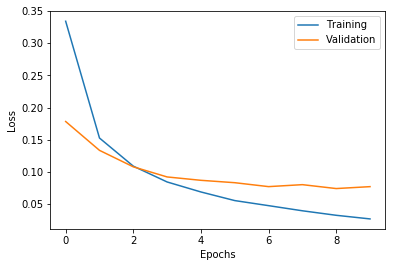

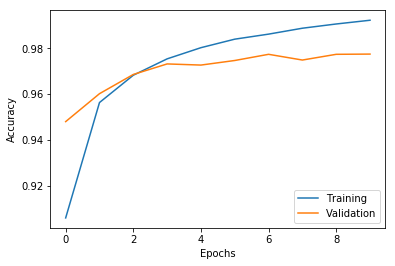

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_curves(hist):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    
plot_curves(hist1)

In [15]:
import keras.datasets
print(dir(keras.datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'boston_housing', 'cifar', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [16]:
print(keras.backend.image_data_format())
#'channels_last' -> (batch_size, rows, cols, channels)
#'channels_first' -> (batch_size, channels, rows, cols)

channels_last


In [17]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

n_input = 32*32*3 # CIFAR data input (img shape: 32*32 * 3 channels)
n_classes = 10 # CIFAR total classes

Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)

In [20]:
print(X_train.shape, Y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [21]:
print(Y_train[0],Y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


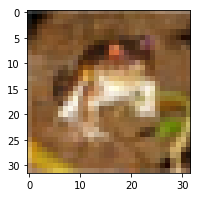

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(X_train[0])
plt.show()

#### Convolution2D

```python
from keras.layers.convolutional import Conv2D

Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 
       data_format=None, dilation_rate=(1, 1), activation=None, 
       use_bias=True, kernel_initializer='glorot_uniform', 
       bias_initializer='zeros', kernel_regularizer=None, 
       bias_regularizer=None, activity_regularizer=None, 
       kernel_constraint=None, bias_constraint=None)
```

#### Arguments:

<ul>
<li><strong>filters</strong>: Integer, the dimensionality of the output space
    (i.e. the number output of filters in the convolution).</li>
<li><strong>kernel_size</strong>: An integer or tuple/list of 2 integers, specifying the
    width and height of the 2D convolution window.
    Can be a single integer to specify the same value for
    all spatial dimensions.</li>
<li><strong>strides</strong>: An integer or tuple/list of 2 integers,
    specifying the strides of the convolution along the width and height.
    Can be a single integer to specify the same value for
    all spatial dimensions.
    Specifying any stride value != 1 is incompatible with specifying
    any <code>dilation_rate</code> value != 1.</li>
<li><strong>padding</strong>: one of <code>"valid"</code> or <code>"same"</code> (case-insensitive).</li>
<li><strong>data_format</strong>: A string,
    one of <code>channels_last</code> (default) or <code>channels_first</code>.
    The ordering of the dimensions in the inputs.
    <code>channels_last</code> corresponds to inputs with shape
    <code>(batch, height, width, channels)</code> while <code>channels_first</code>
    corresponds to inputs with shape
    <code>(batch, channels, height, width)</code>.
    It defaults to the <code>image_data_format</code> value found in your
    Keras config file at <code>~/.keras/keras.json</code>.
    If you never set it, then it will be "channels_last".</li>
<li><strong>dilation_rate</strong>: an integer or tuple/list of 2 integers, specifying
    the dilation rate to use for dilated convolution.
    Can be a single integer to specify the same value for
    all spatial dimensions.
    Currently, specifying any <code>dilation_rate</code> value != 1 is
    incompatible with specifying any stride value != 1.</li>
<li><strong>activation</strong>: Activation function to use
    (see <a href="https://keras.io/activations/">activations</a>).
    If you don't specify anything, no activation is applied
    (ie. "linear" activation: <code>a(x) = x</code>).</li>
<li><strong>use_bias</strong>: Boolean, whether the layer uses a bias vector.</li>
<li><strong>kernel_initializer</strong>: Initializer for the <code>kernel</code> weights matrix
    (see <a href="https://keras.io/initializers/">initializers</a>).</li>
<li><strong>bias_initializer</strong>: Initializer for the bias vector
    (see <a href="https://keras.io/initializers/">initializers</a>).</li>
<li><strong>kernel_regularizer</strong>: Regularizer function applied to
    the <code>kernel</code> weights matrix
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>bias_regularizer</strong>: Regularizer function applied to the bias vector
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>activity_regularizer</strong>: Regularizer function applied to
    the output of the layer (its "activation").
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>kernel_constraint</strong>: Constraint function applied to the kernel matrix
    (see <a href="https://keras.io/constraints/">constraints</a>).</li>
<li><strong>bias_constraint</strong>: Constraint function applied to the bias vector
    (see <a href="https://keras.io/constraints/">constraints</a>).</li>
</ul>

<img src="https://docs.microsoft.com/en-us/cognitive-toolkit/tutorial2/convlayer.png" alt="Drawing" style="width: 700px;"/>

In [23]:
#Q: where does the feature map come from?

# Building a ConvNet

Let's build a Convolutional Neural Network with the following architecture:

- input: images with (32x32x3) pixels
- conv layer with 16 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- conv layer with 20 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- conv layer with 20 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- fully connected layer with 10 neurons (10 classes) and softmax activation

We will then train this model with the Cifar10 dataset (`keras.datasets.cifar10`), minimizing a categorical crossentropy loss with the Adam optimizer.

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D

In [25]:
def conv_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, (5, 5), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(20, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(20, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = conv_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 16, 16, 20)        8020      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 8, 8, 20)          10020     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
__________

Reference for Keras optimization algorithms:   
https://keras.io/optimizers/

In [26]:
#Q: again, why these numbers?

# Training

In [28]:
# Fit the model
hist = model.fit(X_train[:1000], Y_train[:1000],
          validation_data=(X_test, Y_test),
          epochs=20, batch_size=100, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 1000 samples, validate on 10000 samples
Epoch 1/20
1000/1000 [==============================] - 5s 5ms/step - loss: 2.2893 - acc: 0.1220 - val_loss: 2.2721 - val_acc: 0.1584
Epoch 2/20
1000/1000 [==============================] - 1s 800us/step - loss: 2.2329 - acc: 0.1810 - val_loss: 2.1989 - val_acc: 0.1826
Epoch 3/20
1000/1000 [==============================] - 1s 797us/step - loss: 2.1147 - acc: 0.2170 - val_loss: 2.0765 - val_acc: 0.2408
Epoch 4/20
1000/1000 [==============================] - 1s 801us/step - loss: 2.0074 - acc: 0.2660 - val_loss: 2.0039 - val_acc: 0.2849
Epoch 5/20
1000/1000 [==============================] - 1s 806us/step - loss: 1.9408 - acc: 0.2900 - val_loss: 1.9963 - val_acc: 0.2921
Epoch 6/20
1000/1000 [==============================] - 1s 799us/step - loss: 1.8948 - acc: 0.3320 - val_loss: 1.9474 - val_acc: 0.3033
Epoch 7/20
1000/1000 [==============================] - 1s 801us/step - loss: 1.8144 - acc: 0.3460 - val_loss: 1.9264 - val_acc: 0.3098
E

<br><br><br>
<tr>
    <td> <img src="./figures/xkcd2.jpg" style="width: 300px;"/> </td>
</tr>

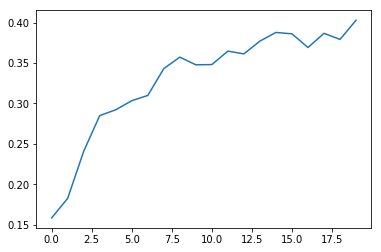

In [29]:
plt.plot(hist.history['val_acc'])

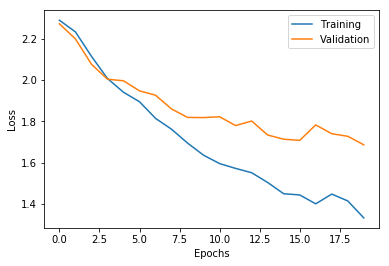

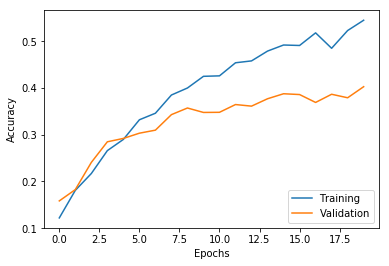

In [30]:
plot_curves(hist)

In [31]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()
predicted = model.predict(X_test).argmax(-1)

In [32]:
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

5972/10000 misclassified examples



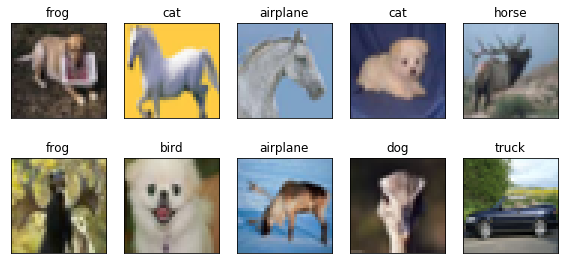

In [33]:
misclassified = [i for i,(p,l) in enumerate(zip(predicted,Y_test_orig)) if not p==l]
print(len(misclassified),'/10000 misclassified examples\n',sep="")

plt.rc("image", cmap="binary")
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    index = np.random.choice(misclassified)
    plt.imshow(X_test_orig[index])
    plt.title(cifar10_labels[predicted[index]])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

### (nice checkout list)
https://blog.slavv.com/37-reasons-why-your-neural-network-is-not-working-4020854bd607

# DEEP LEARNING FOR COMPUTER VISION: <br> A PRACTITIONER'S VIEWPOINT

### André Panisson <br> Alan Perotti 
#### ISI Foundation
---

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Common Use Cases

In this notebook we simulate a few use cases that might happen when running computer vision experiments.

What happens when the number of images in the training set is small? What we might expect when we increase the number of images to train complex models with many convolutional layers?

With the following function, we load the CIFAR-10 dataset and select a subset of $N$ images for the training set and $N$ images for the validation set:

In [35]:
from keras.datasets import cifar10
from keras.utils import to_categorical

cifar_data = cifar10.load_data()
n_input = 32*32*3 # CIFAR data input (img shape: 32*32 * 3 channels)
n_classes = 10 # CIFAR total classes

def get_data(N):
    
    (X_train, Y_train), (X_test, Y_test) = cifar_data
    X_train, Y_train, X_test, Y_test = X_train[:N], Y_train[:N], X_test[:N], Y_test[:N]

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    Y_train = to_categorical(Y_train, n_classes)
    Y_test = to_categorical(Y_test, n_classes)
    
    return X_train, Y_train, X_test, Y_test

In the next, we define a Convolutional Neural Network with the following architecture:

- input: images with (32x32x3) pixels
- conv layer with 16 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- conv layer with 20 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- conv layer with 20 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- dropout layer
- fully connected layer with 10 neurons (10 classes) and softmax activation

The function `conv_model` takes as argument the rate for the dropout layer. With this parameter, we can control the fraction of input units that are deactivated at each update during training time.

By default, the dropout rate is set to be very small, which means that all input units (320 in this case) will be activatet during training time.

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D

def conv_model(dropout_rate=0.01):
    # create model
    model = Sequential()
    model.add(Convolution2D(16, (5, 5), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(20, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(20, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

conv_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_192 (Conv2D)          (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 16, 16, 20)        8020      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 8, 8, 20)          10020     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
__________

The next function defines how we run each experiment.

We start by selecting $N$ images for the training set and $N$ images for the validation set. We create the convolutional neural network as defined above, with the given dropout rate. Then, we save the model to disk, evaluate the model using the validation set and plot the curves showing the evolution of loss and accuracy for each trained epoch, for the training set and for the validation set.

This function has also the ability of loading a model if it was trained previously.

In [37]:
from keras.models import load_model
import pickle

def plot_curves(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].plot(history['loss'])
    ax[0].plot(history['val_loss'])
    ax[0].legend(['Training', 'Validation'])

    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].plot(history['acc'])
    ax[1].plot(history['val_acc'])
    ax[1].legend(['Training', 'Validation'], loc='lower right')

def run_experiment(N, conv_model=conv_model, dropout_rate=0.01, epochs=100, overwrite=False):
    
    X_train, Y_train, X_test, Y_test = get_data(N)

    model_name = "conv_n{}_dr{:.2f}_e{}".format(N, dropout_rate, epochs)
    loaded = False
    
    if not overwrite:
        try:
            model = load_model("models/%s.hdf5" % model_name)
            with open("models/%s.hist" % model_name, 'br') as fh:
                history = pickle.load(fh)
            loaded = True
        except:
            pass
        
    if overwrite or not loaded:
        model = conv_model(dropout_rate)

        print("Training model...")
        # Fit the model
        hist = model.fit(X_train, Y_train,
                  validation_data=(X_test, Y_test),
                  epochs=epochs, batch_size=32, verbose=1)
        history = hist.history
        model.save("models/%s.hdf5" % model_name)
        with open("models/%s.hist" % model_name, 'bw') as fh:
            pickle.dump(history, fh)
    
    # Evaluation of the model
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

    plot_curves(history)

### Case 1

**Small data, a complex model to train.**  
In this case, we have 100 images for training and 100 images for validation. We use the default dropout rate (all units will be active during training phase).

Baseline Error: 79.00%


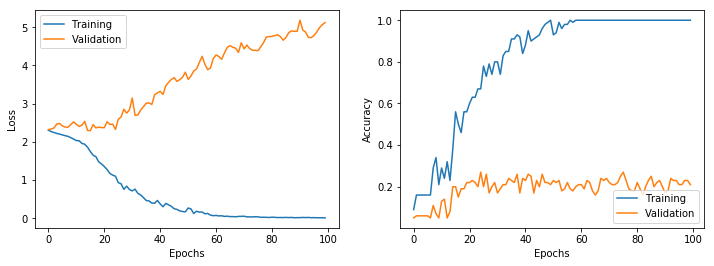

In [38]:
run_experiment(100)

The training loss declines at each epoch, but validation loss doesn't decline at all. We end up with a perfect classification score in the training set, but a bad accuracy for the validation set.

### Case 2

**Some more data, a complex model to train.**   
In this case, we have 200 images for training and 200 images for validation. We use the default dropout rate (all units will be active during training phase).

Baseline Error: 72.00%


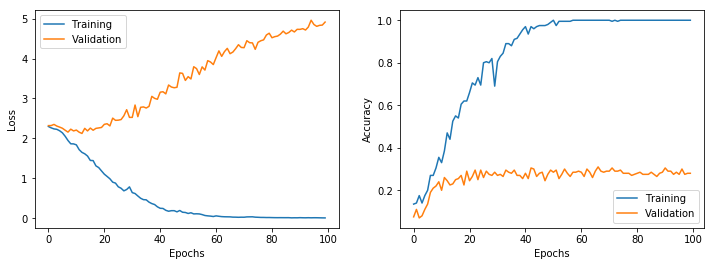

In [39]:
run_experiment(200)

The training loss declines at each epoch, and validation loss starts to decline at the beginning, but starts to grow again. We end up again with a perfect classification score in the training set, and the accuracy for the validation set is a bit better than before.

### Case 3

We keep increasing the number of samples (500), still a complex model to train.  
In this case, we use 500 images for training and 500 images for validation. We use the default dropout rate (all units will be active during training phase).

Baseline Error: 64.20%


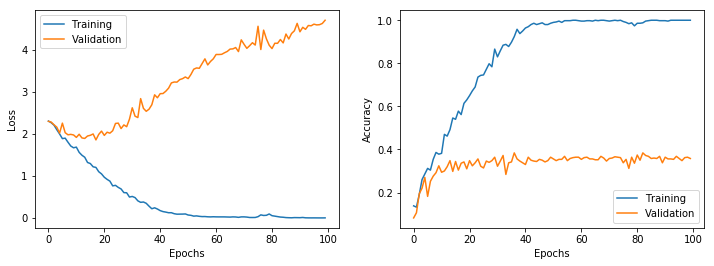

In [40]:
run_experiment(500)

The training loss declines at each epoch, and validation loss starts to decline at the beginning, but starts to grow again. We end up again with a perfect classification score in the training set, and the accuracy for the validation set better than previous cases.

### Case 4

**Small data, less complex model.**  
In this case, we have 200 images for training and 200 images for validation. We use a dropout rate of 0.6, meaning that at each training step 60% of the units in the last layer will be deactivated.

Baseline Error: 69.00%


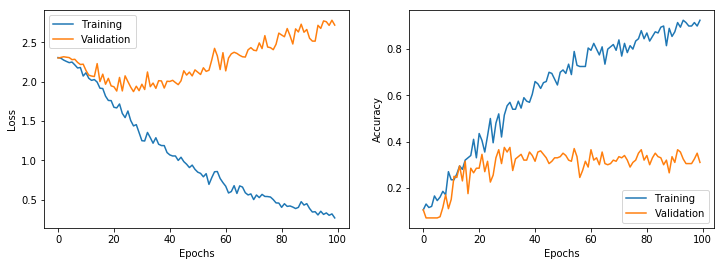

In [41]:
run_experiment(200, dropout_rate=0.6)

The training loss declines at each epoch, and validation loss starts to decline at the beginning, and again starts to grow again, but the grow is more limited. We end up with a classification score that is not perfect for the training set, and the accuracy for the validation set better than previous case where we used the same number of samples for training.

### Case 5

**More data, less complex model.**   
In this case, we use 500 images for training and 500 images for validation. We use a dropout rate of 0.8, meaning that at each training step 80% of the units in the last layer will be deactivated.

Baseline Error: 60.20%


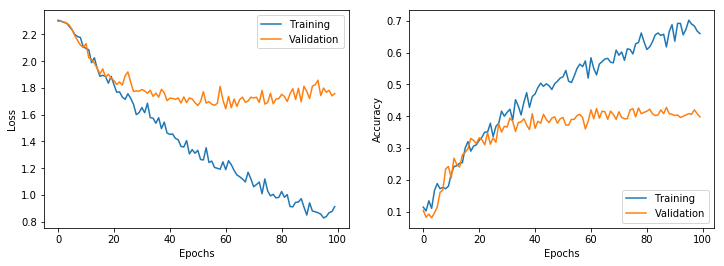

In [42]:
run_experiment(500, dropout_rate=0.8)

The training loss declines at each epoch, and validation loss starts to decline at the beginning, and then stabilizes. We end up with a classification score that is much lower for the training set, and the accuracy for the validation set better than previous cases.

---
In the next notebook, we will use a bit of learning theory to understand what is happening in these cases.

# DEEP LEARNING FOR COMPUTER VISION: <br> A PRACTITIONER's VIEWPOINT

### André Panisson <br> Alan Perotti 
#### ISI Foundation
---

## Learning Theory in a Nutshell

### A few things that even a practitioner should know.

In this notebook, we will see how the theory of approximation-generalization works in practice, by producing and interpreting the learning curves for different models.

In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's consider a simple 1D regression problem.  This will help us to
easily visualize the data and the model, and the results generalize easily to  higher-dimensional
datasets.  We'll explore a simple **linear regression** problem.
This can be accomplished within scikit-learn with the `sklearn.linear_model` module.

We'll create a simple nonlinear function that we'd like to fit.

In [44]:
def make_data(N=30, err=0.8, seed=1):
    # randomly sample the data
    rng = np.random.RandomState(seed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(1000, seed=1)

In [45]:
X_train = X[:30]
y_train = y[:30]

X_fit = np.linspace(-0.1, 1.1, 500)[:, np.newaxis]

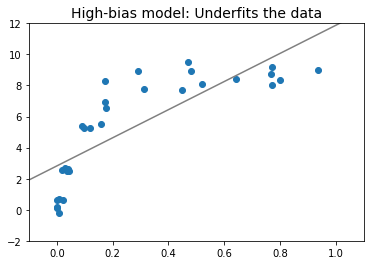

In [46]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)

plt.scatter(X_train.ravel(), y_train)
plt.plot(X_fit.ravel(), model1.predict(X_fit), color='gray')
plt.axis([-0.1, 1.1, -2, 12])
plt.title('High-bias model: Underfits the data', size=14);

We have fit a straight line to the data, but clearly this model is not a good choice.  We say that this model has a high **bias**, or that it **under-fits** the data.

Let's try to improve this by creating a more complicated model. We can do this by adding degrees of freedom, using a **polynomial regression** model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter.
For example, a degree-1 polynomial fits a straight line to the data; for model parameters $a$ and $b$:

$$
y = ax + b
$$

A degree-3 polynomial fits a cubic curve to the data; for model parameters $a, b, c, d$:

$$
y = ax^3 + bx^2 + cx + d
$$

We can generalize this to any number of polynomial features.
In Scikit-Learn, we can implement this with a simple linear regression combined with a polynomial transformation of the input.

In [47]:
class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.predict(self, Xp)

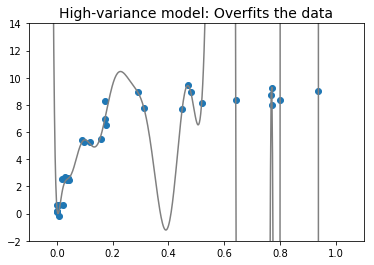

In [48]:
model20 = PolynomialRegression(20).fit(X_train, y_train)

plt.scatter(X_train.ravel(), y_train)
plt.plot(X_fit.ravel(), model20.predict(X_fit), color='gray')
plt.axis([-0.1, 1.1, -2, 14])
plt.title('High-variance model: Overfits the data', size=14);

This last model attempts to fit a high-order polynomial through the data. Here the model has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data rather than the intrinsic properties of whatever process generated that data. Such a model is said to **overfit** the data: that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has **high variance**.

To look at this in another light, consider what happens if we use these two models to predict the y-value for some new data. In the following diagrams, the red/lighter points indicate data that is omitted from the training set:

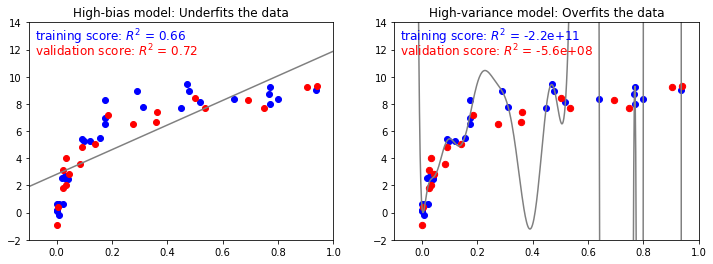

In [49]:
X_test, y_test = make_data(20, seed=42)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X_train.ravel(), y_train, c='blue')
ax[0].plot(X_fit.ravel(), model1.predict(X_fit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=12)
ax[0].scatter(X_test.ravel(), y_test, c='red')

ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=12, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X_test, y_test)),
           ha='left', va='top', transform=ax[0].transAxes, size=12, color='red')

ax[1].scatter(X_train.ravel(), y_train, c='blue')
ax[1].plot(X_fit.ravel(), model20.predict(X_fit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=12)
ax[1].scatter(X_test.ravel(), y_test, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=12, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X_test, y_test)),
           ha='left', va='top', transform=ax[1].transAxes, size=12, color='red');

The score here is the $R^2$ score, or [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), which measures how well a model performs relative to a simple mean of the target values:

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$

where $\bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i$.

$R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models.
From the scores associated with these two models, we can make an observation that holds more generally:

- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

## Model Selection: Tuning Model Complexity

The number of effective parameters that we can adjust in our model represents the model complexity. More parameters we can adjust (higher polynomial order in this example) means that the model is more complex.

If we have a **fixed training set**, we can only choose how much the model is complex. A model that is too simple will underfit the data, and a model that is too complex will overfit the data. 

If we check both the training scores and the validation scores for this example, we have the following curve:

Best choice for polynomial degree: 6


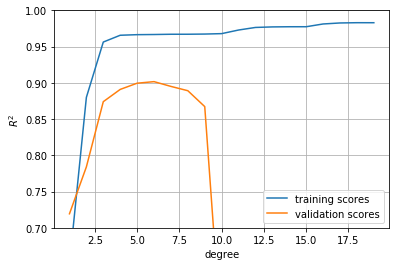

In [50]:
degrees = np.arange(1, 20)

training_scores = []
test_scores = []

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
plt.plot(degrees, training_scores, label='training scores')
plt.plot(degrees, test_scores, label='validation scores')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$')
plt.ylim(0.7, 1);
plt.grid()

print("Best choice for polynomial degree: {}".format(degrees[np.argmax(test_scores)]))

This is an example of a **validation curve**, and we see the following essential features:

- The **training score is higher than the validation score** (except for some statistical fluctuations). This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
- A model with **low complexity** (a high-bias model) **underfits the data**, which means that the model is a poor predictor both for the training data and for any previously unseen data. In this case we observe low approximation and high generalization.
- A model with **high complexity** (a high-variance model) **overfits the data**, which means that the model predicts the training data very well, but fails for any previously unseen data. In this case, we observe high approximation but low generalization.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a **suitable trade-off between bias and variance**, and the right complexity where we can observe both high approximation and high generalization.

<img src="./figures/validation-curve.png"/>

If we change the training set by increasing the number of training points, we will observe a different validation curve:

Best choice for polynomial degree: 18


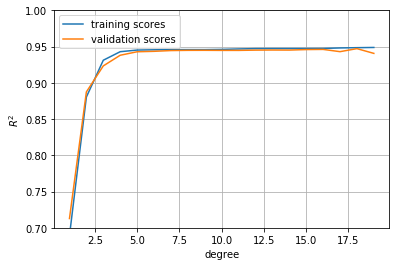

In [51]:
degrees = np.arange(1, 20)

N = 100
X2, y2 = make_data(N)
X2_test, y2_test = make_data(N, seed=42)

training_scores = []
test_scores = []

for d in degrees:
    model = PolynomialRegression(d).fit(X2, y2)
    training_scores.append(model.score(X2, y2))
    test_scores.append(model.score(X2_test, y2_test))
    
plt.plot(degrees, training_scores, label='training scores')
plt.plot(degrees, test_scores, label='validation scores')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$')
plt.ylim(0.7, 1)
plt.grid()

print("Best choice for polynomial degree: {}".format(degrees[np.argmax(test_scores)]))

This means that the number of training examples plays also an important role in the behaviour of the validation curves.

Now let's look at what happens to the $R^2$ for different values of $N$:

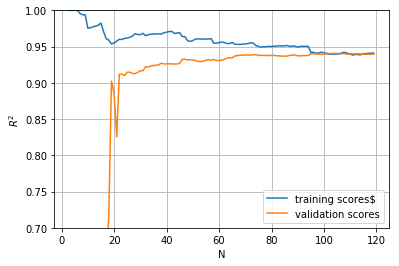

In [52]:
model = PolynomialRegression(degree=5)

training_scores = []
test_scores = []

N_list = range(3, 120)
X_test, y_test = make_data(100, seed=42)

for N in N_list:
    X_train = X[:N]
    y_train = y[:N]
    
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
plt.plot(N_list, training_scores, label='training scores$')
plt.plot(N_list, test_scores, label='validation scores')
plt.legend()
plt.xlabel('N')
plt.ylabel('$R^2$')
plt.grid()
plt.ylim(0.7, 1);

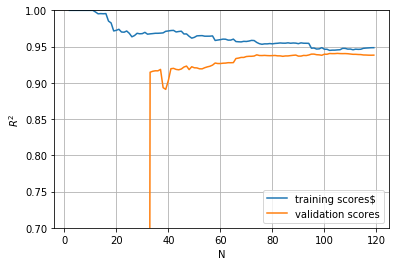

In [53]:
model = PolynomialRegression(degree=10)

training_scores = []
test_scores = []

N_list = range(2, 120)

for N in N_list:
    X_train = X[:N]
    y_train = y[:N]
    
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
plt.plot(N_list, training_scores, label='training scores$')
plt.plot(N_list, test_scores, label='validation scores')
plt.legend()
plt.xlabel('N')
plt.ylabel('$R^2$')
plt.grid()
plt.ylim(0.7, 1);

<img src="figures/learning-curve.png"/>

In general, the **validation score** will always be the **training score** minus a **penalty**, and this penalty depends on **N** (the number of samples in the training set) and on the **model complexity**. The higher is N, the lower is the penalty. The higher is the model complexity, the higher is the penalty. The more complex is the model, the more samples you need to generalize better.

You can think about this as if you are building a **rocket**, and you need **fuel** to make it fly. The bigger is the rocket, the more fuel you need to make it fly!

<img src="figures/rocket.png"/>

### If you want to learn more:

- [Learning From Data](http://amlbook.com/), a book from Yaser S. Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin with many concepts about learning theory (with video lessons!).
- [Statistical Learning Theory](https://www.wiley.com/en-us/Statistical+Learning+Theory-p-9780471030034), from Vladimir N. Vapnik.
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), an interactive book (written using Jupyter Notebooks) form Jake VanderPlas.



### Some other concepts that might be useful for a Machine Learning practitioner's everyday life.

### Cross validation

Cross-validation (CV) is a model validation technique for assessing how the results of a model will generalize to an independent data set using all points in the dataset for validation.

In the basic CV approach, called *k*-fold CV,
the training set is split into *k* smaller sets.
The following procedure is followed for each of the *k* "folds":

 * A model is trained using $k-1$ of the folds as training data;
 * the resulting model is validated on the remaining part of the data
   (i.e., it is used as a test set to compute a performance measure
   such as accuracy).

The performance measure reported by *k*-fold cross-validation
is then the average of the values computed in the loop.
This approach can be computationally expensive,
but does not waste too much data
(as it is the case when fixing an arbitrary test set)

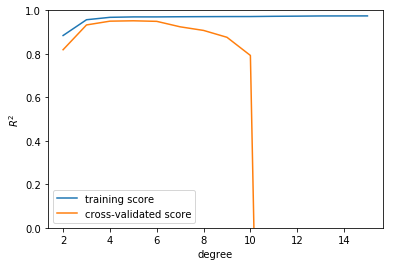

In [54]:
from sklearn import model_selection
N = 40
X_train = X[:N]
y_train = y[:N]

degrees = np.arange(2, 16)

training_scores = []
test_scores = []

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    
    scores = model_selection.cross_val_score(model, X_train, y_train, cv=5)
    test_scores.append(np.mean(scores))

# note that the test error can also be computed via cross-validation
plt.plot(degrees, training_scores, label='training score')
plt.plot(degrees, test_scores, label='cross-validated score')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$')
plt.ylim(0.0, 1.0);

### Regularization

With regularization, we add constraints to the model, by limiting the space of the parameter values.

For example, with L1 regularization, we add a term to the error function:
$$\alpha \sum_{d=0}^D {|w_d|}$$
With L2 regularization, we add this term:
$$\alpha \sum_{d=0}^D {w_d^2} $$
For example, the error function of Linear Regression with L1 regularization becomes
$$ \frac{1}{N} \sum_{i=1}^N {\left( \mathbf{w}x_i - y_i \right)^2} + \alpha \sum_{d=0}^D |{w_d}| $$
With regularization, we are not free to change all parameters independently: If we set one parameter to a high value, we implicitly force other parameters to be smaller. The degrees of freedom thus are smaller than without the restriction. As result, we are reducing the effective parameters (or VC dimension).

In [55]:
from sklearn.linear_model import Lasso

class RegularizedPolynomialRegression(Lasso):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, alpha=1.0, **kwargs):
        self.degree = degree
        self.alpha = alpha
        Lasso.__init__(self, alpha=alpha, max_iter=100000, tol=0.01, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return Lasso.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return Lasso.predict(self, Xp)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


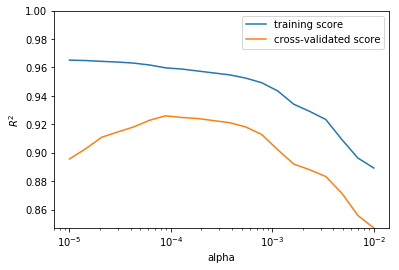

In [56]:
from sklearn import model_selection

X_train, y_train = make_data(40)

degree = 100
alphas = np.logspace(-5, -2, 20)

training_scores = []
test_scores = []

for alpha in alphas:
    model = RegularizedPolynomialRegression(degree, alpha=alpha).fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    
    scores = model_selection.cross_val_score(model, X_train, y_train, cv=5)
    test_scores.append(np.mean(scores))

# note that the test error can also be computed via cross-validation
plt.plot(alphas, training_scores, label='training score')
plt.plot(alphas, test_scores, label='cross-validated score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.xscale('log')
plt.ylim(np.min(test_scores), 1.);

# DEEP LEARNING FOR COMPUTER VISION: <br> A PRACTITIONER'S VIEWPOINT

### André Panisson <br> Alan Perotti 
#### ISI Foundation
---

# Pre-trained Convolutional Neural Networks

Many Deep Neural Networks models have been trained in the [ImageNet dataset](http://www.image-net.org/). The training of such network architectures might take days or weeks to finish, but the weights can be shared after the training procedure.

## Inception V3 model

For example, with Keras it is possible to load the implementation of Google Inception V3 model and load the weights that have been produced after training in the ImageNet dataset.

![](./figures/inceptionv3.png)

**References**
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567)
- [Google Research Blog](https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html)

Credits: François Chollet (https://github.com/fchollet/deep-learning-models)

In [57]:
%pylab inline

from keras.applications import inception_v3
from keras.preprocessing import image

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['degrees']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [58]:
img_path = 'figures/kitten.png'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x_cat = inception_v3.preprocess_input(x)

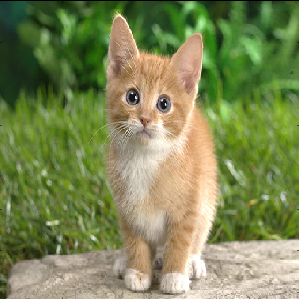

In [59]:
img

In [60]:
model = inception_v3.InceptionV3(include_top=True, weights='imagenet')

In [61]:
# model.summary()

In [62]:
preds = model.predict(x_cat)
print('Predicted:', inception_v3.decode_predictions(preds))

Predicted: [[('n02123159', 'tiger_cat', 0.4622012), ('n02124075', 'Egyptian_cat', 0.1321687), ('n02113023', 'Pembroke', 0.06409031), ('n02123045', 'tabby', 0.050259486), ('n02119789', 'kit_fox', 0.013312003)]]


# Transfer Learning

Many Deep Neural Networks models have been trained in very large datasets (e.g. [ImageNet](http://www.image-net.org/), which contains 1.2 million images with 1000 categories). The training of such network architectures might take days or weeks to finish, but the weights can be shared after the training procedure.

In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pretrain a ConvNet on a very large dataset, and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest. The two major Transfer Learning scenarios look as follows:

- ConvNet as fixed feature extractor. Take a ConvNet pretrained on ImageNet, remove the last fully-connected layer (this layer’s outputs are the 1000 class scores for a different task like ImageNet), then treat the rest of the ConvNet as a fixed feature extractor for the new dataset. In an AlexNet, this would compute a 4096-D vector for every image that contains the activations of the hidden layer immediately before the classifier. We call these features CNN codes. It is important for performance that these codes are ReLUd (i.e. thresholded at zero) if they were also thresholded during the training of the ConvNet on ImageNet (as is usually the case). Once you extract the 4096-D codes for all images, train a linear classifier (e.g. Linear SVM or Softmax classifier) for the new dataset.
- Fine-tuning the ConvNet. The second strategy is to not only replace and retrain the classifier on top of the ConvNet on the new dataset, but to also fine-tune the weights of the pretrained network by continuing the backpropagation. It is possible to fine-tune all the layers of the ConvNet, or it’s possible to keep some of the earlier layers fixed (due to overfitting concerns) and only fine-tune some higher-level portion of the network. This is motivated by the observation that the earlier features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks, but later layers of the ConvNet becomes progressively more specific to the details of the classes contained in the original dataset. In case of ImageNet for example, which contains many dog breeds, a significant portion of the representational power of the ConvNet may be devoted to features that are specific to differentiating between dog breeds.

# Scraping

In [63]:
import os
import keras
from keras.preprocessing import image

This script downloads a set of images from Google Images given a set of keywords. Very useful for training image classification algorithms.  
(Author: Hardik Vasa, https://github.com/hardikvasa/google-images-download)

In [65]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()    

In [66]:
def scrape(keyword, max_num):
    response.download({"keywords": keyword, "limit":max_num, "format":"png", "output_directory":"./google_images"})

scrape('rubik', 10)


Item no.: 1 --> Item name = rubik
Evaluating...
Starting Download...
Completed Image ====> 1. 3x3_1__enlarged.png
Completed Image ====> 2. rubik_cube_1200x1200.png
Completed Image ====> 3. rubiks-cube.png
Completed Image ====> 4. touch_1__enlarged.png
Completed Image ====> 5. 5845c5b0-6b16-4a17-a305-b941546509a3_4.947e8a77da638100eff2698ab123f721.png
Completed Image ====> 6. 1024px-rubik%27s_cube_scrambled.svg.png
Completed Image ====> 7. rubiks-cube-coloured.png
Completed Image ====> 8. solution-white-edges.png
Completed Image ====> 9. rubik-cube-cmyk_2182.png
Completed Image ====> 10. illustration-top.png

Errors: 0



In [67]:
scrape('iron man', 10)


Item no.: 1 --> Item name = iron man
Evaluating...
Starting Download...
Completed Image ====> 1. latest?cb=20180318221316.jpg
Completed Image ====> 2. latest?cb=20150208173247.jpg
Completed Image ====> 3. latest?cb=20150603032716.jpg
Completed Image ====> 4. latest?cb=20170818120138.jpg
Completed Image ====> 5. usa_avengers_chi_ironman_n_cf2a66b6.png
Completed Image ====> 6. latest?cb=20150404070629.jpg
Completed Image ====> 7. avengers_infinity_war___iron_man_png
Completed Image ====> 8. latest?cb=20150310161345.jpg
Completed Image ====> 9. latest?cb=20150309164237.jpg
Completed Image ====> 10. latest?cb=20160610130645.jpg

Errors: 0



In [68]:
# cleanup from bad images
import glob
from keras.preprocessing import image

for img_path in glob.glob('./google_images/**/*'):
    try:
        img = image.load_img(img_path, target_size=(299, 299))
    except OSError:
        print("Error loading image ", img_path)
        !rm "$img_path"

/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [69]:
def loader(classname):
    folder = './google_images/'+classname
    fnames = [folder+'/'+x for x in os.listdir(folder)]
    collected = []
    for f in fnames:
        img = image.load_img(f, target_size=(299, 299))
        x = image.img_to_array(img)
        x = keras.applications.inception_v3.preprocess_input(x)
        collected.append(x)
    return np.array(collected)

In [70]:
rubik_pics = loader('rubik')
print(rubik_pics.shape)

(60, 299, 299, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


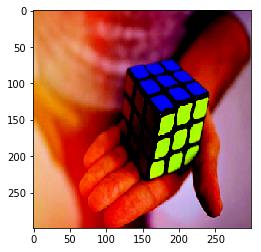

In [71]:
plt.imshow(rubik_pics[0])

In [72]:
print('Predicted:', inception_v3.decode_predictions(model.predict(np.array([rubik_pics[0]]))))

Predicted: [[('n03637318', 'lampshade', 0.3803253), ('n03530642', 'honeycomb', 0.30031982), ('n04380533', 'table_lamp', 0.08530755), ('n03255030', 'dumbbell', 0.06002027), ('n03314780', 'face_powder', 0.006686369)]]


# Training a custom TL-based Binary Classifier

In [73]:
import keras
model = inception_v3.InceptionV3(include_top=False, weights='imagenet')

In [74]:
img_path = 'figures/kitten.png'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x_cat = inception_v3.preprocess_input(x)

In [75]:
feature_mappings = model.predict(x_cat)
print(feature_mappings.shape)

(1, 8, 8, 2048)


In [76]:
model.layers[-5:]

Freeze the layers which you don't want to train. Here we are freezing all layers.

In [77]:
for layer in model.layers:
    layer.trainable = False

Add the Dense layers to the top of the network

In [78]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model

In [79]:
#Adding custom Layers 
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs=model.input, outputs=predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

Image generator that uses data augmentation with the downloaded images.

In [80]:
!rm -r google_images/.ipynb_checkpoints
!ls -a google_images

rm: cannot remove 'google_images/.ipynb_checkpoints': No such file or directory
.  ..  iron man  rubik


In [81]:
from keras.preprocessing.image import ImageDataGenerator

# Initiate the train and test generators with data Augumentation 
data_gen_args = dict(
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30,
    preprocessing_function=inception_v3.preprocess_input
)

train_datagen = ImageDataGenerator(**data_gen_args)
test_datagen  = ImageDataGenerator(**data_gen_args)

(img_height, img_width) = (299, 299)
batch_size = 8
train_data_dir = './google_images'
validation_data_dir = './google_images'

nb_train_samples = 100
nb_validation_samples = 10
epochs = 10

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical",
seed=42)

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical",
seed=42)

Found 118 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [82]:
model_final.fit_generator(
train_generator,
steps_per_epoch = nb_train_samples/batch_size,
epochs = 5,
validation_data = validation_generator,
validation_steps = 2
)

Epoch 1/5


/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


13/12 [===============================] - 14s 1s/step - loss: 0.6432 - acc: 0.6444 - val_loss: 1.5912 - val_acc: 0.4375
Epoch 2/5
13/12 [===============================] - 6s 435ms/step - loss: 0.8248 - acc: 0.5933 - val_loss: 0.2979 - val_acc: 0.9375
Epoch 3/5
13/12 [===============================] - 5s 420ms/step - loss: 0.6897 - acc: 0.6923 - val_loss: 0.1424 - val_acc: 1.0000
Epoch 4/5
13/12 [===============================] - 5s 405ms/step - loss: 0.4722 - acc: 0.8138 - val_loss: 0.3226 - val_acc: 0.8750
Epoch 5/5
13/12 [===============================] - 5s 360ms/step - loss: 0.3707 - acc: 0.8558 - val_loss: 0.1382 - val_acc: 0.8750


Save the model to disk

In [83]:
import datetime
now = datetime.datetime.now().strftime('%Y%m%d%H%M%S')

model_file_name = "model_final_%s.json"%now
weghts_file_name = "model_final_%s.h5"%now

# serialize model to JSON
model_json = model.to_json()
with open(model_file_name, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(weghts_file_name)

print("Saved model to disk. Model was saved in %s. Weights were saved in %s." % (model_file_name, weghts_file_name))

Saved model to disk. Model was saved in model_final_20181008164739.json. Weights were saved in model_final_20181008164739.h5.


In [84]:
import glob
from IPython.display import display

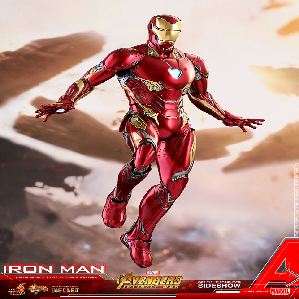

[('iron man', 0.99185854), ('rubik', 0.008141398)] 




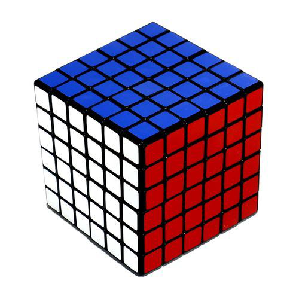

[('iron man', 0.0053458414), ('rubik', 0.9946542)] 




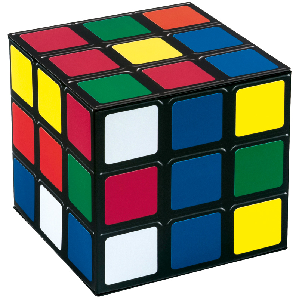

[('iron man', 0.003013975), ('rubik', 0.9969861)] 




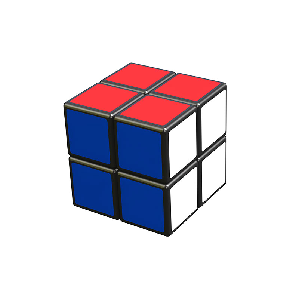

[('iron man', 0.0037815215), ('rubik', 0.9962185)] 




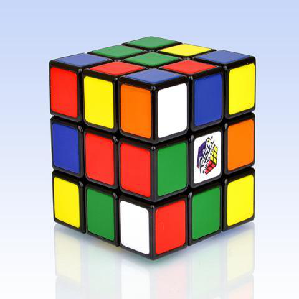

[('iron man', 0.0020386535), ('rubik', 0.9979614)] 




In [85]:
image_paths = glob.glob(train_data_dir + '/**/*.jpg')
shuffle(image_paths)
my_labels = os.listdir('./'+train_data_dir)


for img_path in image_paths[:5]:
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = inception_v3.preprocess_input(x)
    pred = model_final.predict(x)
    
    display(img)
    print(list(zip(my_labels,pred[0])),'\n\n')

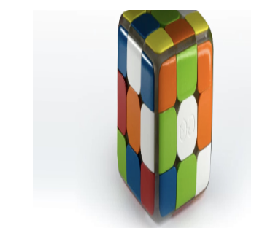

[('iron man', 0.020922106), ('rubik', 0.9790779)] 




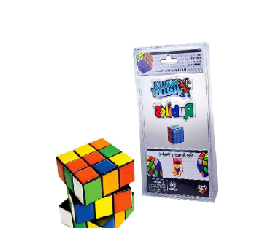

[('iron man', 0.012276877), ('rubik', 0.9877231)] 




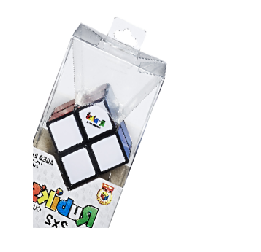

[('iron man', 0.018446563), ('rubik', 0.98155344)] 




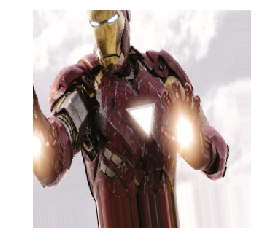

[('iron man', 0.9937552), ('rubik', 0.0062447647)] 




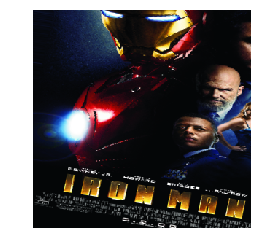

[('iron man', 0.913818), ('rubik', 0.08618203)] 




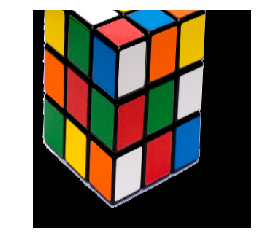

[('iron man', 0.0023333104), ('rubik', 0.9976667)] 




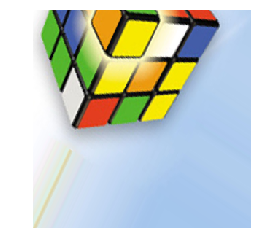

[('iron man', 0.0029863096), ('rubik', 0.9970137)] 




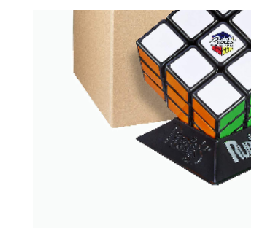

[('iron man', 0.0053325067), ('rubik', 0.99466753)] 




In [86]:
batch = next(validation_generator)[0]

for i in range(len(batch)):
    x = batch[[i]]
    x -= x.min()
    x /= x.max()
    pred = model_final.predict(x)
    
    fig = plt.figure()
    plt.imshow(x[0])
    plt.axis('off')
    display(fig)
    plt.close()
    print(list(zip(my_labels,pred[0])),'\n\n')